#### Aluna: Thaís de Souza Deluca Ferreira
#### Disciplina: Aprendizado de Máquina 2021.1

### Importanto as bibliotecas necessárias para a análise, modelos preditivos e avaliação.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
from pandas import Series
from math import ceil

# Métricas necessárias
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# O relatório de classificação será importante para termos uma sumarização dos resultados
from sklearn.metrics import classification_report
# A Matriz de Confusão será importante pois mostra as frequências de classificação para cada classe do modelo (TP, FP, TN e FN)
from sklearn.metrics import confusion_matrix
# Necessário para dividir os dados em treinamento e teste
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Apenas para ignorar os avisos
import warnings
warnings.filterwarnings('ignore')

### Importando o dataset do GitHub

Obs.:
*   Vendas_NA: América do Norte 
*   Vendas_PAL: Índia, China, Países Europeus (exceto França), Australia etc.
*   Vendas_JP: Japão

Dataset utilizado: https://www.kaggle.com/baynebrannen/video-game-sales-2020?select=vgchartz-7_7_2020.csv

In [ ]:
# Criando uma variável para guardar o caminho do dataset.
# Esse caminho sempre se altera, sendo necessário acessar o dataset no GitHub, selecionar "View Raw" e usar a url aqui no caminho.
data_path = "https://raw.githubusercontent.com/ThaisPGC/Aprendizado-Maquina-2021/main/vgchartz-7_7_2020.csv?token=AUQ5O7GN4R3LV4LMGG66A6TA2UV7M"
# Importando o dataset
data_df = pd.read_csv(data_path, encoding="utf-8")

# Criando uma cópia
data_df2 = data_df
data_df2 = data_df2.copy()

# Renomeando algumas colunas
data_df.columns = ['Rank','Img_url', 'Título', 'Plataforma', 'Gênero', 'Editora', 'Desenvolvedora', 'VG_Score', 'Critic_Score', 'User_Score', 'Envio_Total', 'Vendas_Globais', 'NA_Vendas', 'JP_Vendas', 'PAL_Vendas', 'Outras_Vendas', 'Lançamento', 'Atualização']
data_df2.columns = ['Rank', 'Img_url', 'Título', 'Plataforma', 'Gênero', 'Editora', 'Desenvolvedora', 'VG_Score', 'Critic_Score', 'User_Score', 'Envio_Total', 'Vendas_Globais', 'NA_Vendas', 'JP_Vendas', 'PAL_Vendas', 'Outras_Vendas', 'Lançamento', 'Atualização']
#data_dfc.columns = ['Nome', 'Plataforma', 'Ano', 'Gênero', 'Editora', 'NA_Vendas', 'EU_Vendas', 'JP_Vendas', 'Outros_Vendas', 'Vendas_Globais', 'Nota_Critica', 'Quant_Critica', 'Nota_Usuario', 'Quant_Usuario', 'Desenvolvedora', 'Rating']
#data_dfc.columns = ['Ranking', 'Nome', 'nome-base', 'Gênero', 'ESRB', 'Plataforma', 'Editora', 'Desenvolvedora', 'VGChartz_Score', 'Pontos_Crítica', 'Pontos_Usuário', 'Total_Enviado', 'Vendas_Globais', 'Vendas_NA', 'Vendas_PAL', 'Vendas_JP', 'Outras_Vendas', 'Ano', 'Última_Atualização', 'url', 'Status', 'Vgchartzscore', 'img_url']

# Visualizando as 5 primeiras linhas do dataframe
data_df[:5]

,Rank,Img_url,Título,Plataforma,Gênero,Editora,Desenvolvedora,VG_Score,Critic_Score,User_Score,Envio_Total,Vendas_Globais,NA_Vendas,JP_Vendas,PAL_Vendas,Outras_Vendas,Lançamento,Atualização
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,1981-10-23,2020-02-26


In [ ]:
# Verificando os valores nulos no dataset
data_df.isnull().values.any()

True

In [ ]:
# Verificando quais colunas contêm valores nulos
print(data_df['Título'].isnull().values.any())
print(data_df['Plataforma'].isnull().values.any())
print(data_df['Gênero'].isnull().values.any())
print(data_df['Editora'].isnull().values.any())
print(data_df['Desenvolvedora'].isnull().values.any())
print(data_df['VG_Score'].isnull().values.any())
print(data_df['Critic_Score'].isnull().values.any())
print(data_df['User_Score'].isnull().values.any())
print(data_df['Envio_Total'].isnull().values.any())
print(data_df['Vendas_Globais'].isnull().values.any())
print(data_df['NA_Vendas'].isnull().values.any())
print(data_df['JP_Vendas'].isnull().values.any())
print(data_df['PAL_Vendas'].isnull().values.any())
print(data_df['Outras_Vendas'].isnull().values.any())
print(data_df['Lançamento'].isnull().values.any())
print(data_df['Atualização'].isnull().values.any())

False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# Removendo as linhas com valores nulos das colunas que serão interessantes de se analisar
data_df = data_df.dropna(axis = 0, subset = ['Desenvolvedora', 'Vendas_Globais'])

# Verificando para ver se foram removidas
print(data_df['Desenvolvedora'].isnull().values.any())
print(data_df['Vendas_Globais'].isnull().values.any())


False
False


### Quantidade de jogos vendidos por plataforma, desenvolvedoras, editoras e gênero do jogo.

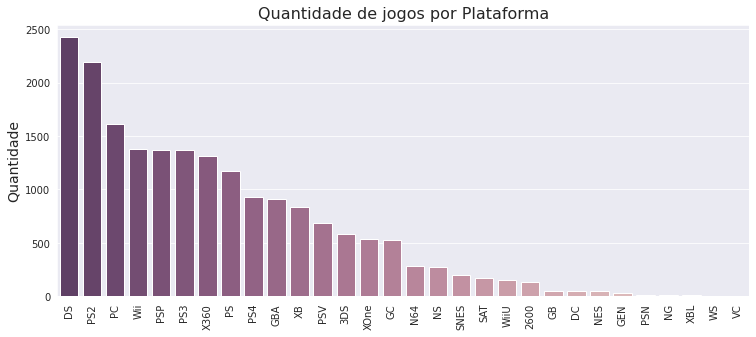

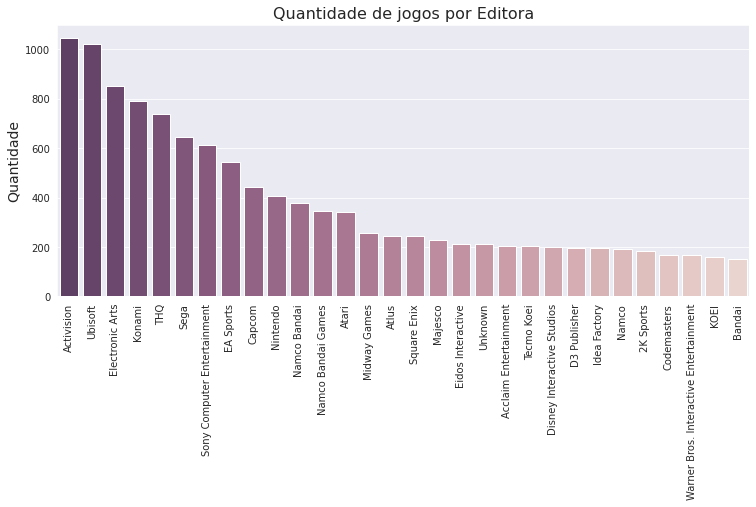

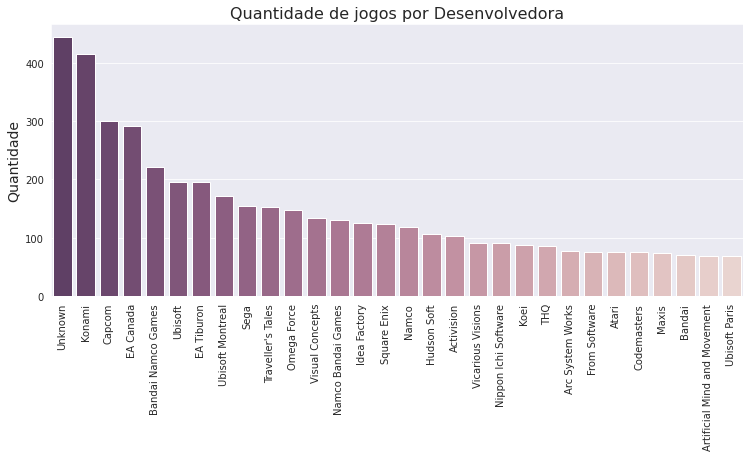

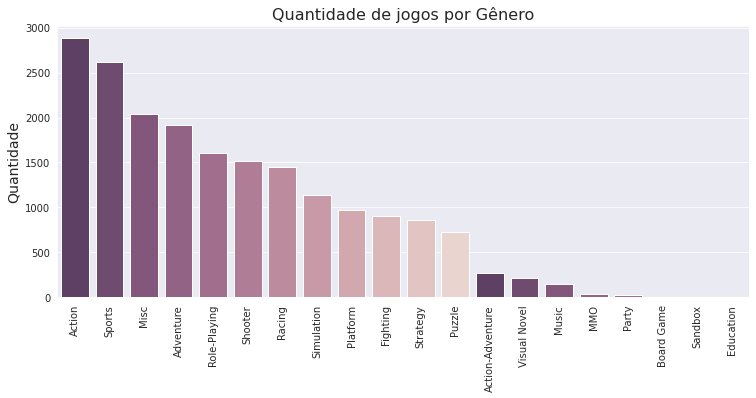

In [ ]:
# Selecionando as colunas de interesse
colunas = ['Plataforma', 'Editora', 'Desenvolvedora', 'Gênero']

for col in colunas:
  chart = data_df[['Título', col]].groupby([col]).count().sort_values('Título', ascending = False).reset_index()
  # Selecionando o estilo (white, dark, whitegrid, darkgrid, ticks)
  sns.set_style('darkgrid')
  # Plotando a imagem
  plt.figure(figsize=(12.4, 5))
  plt.xticks(rotation=90)
  sns.barplot(x = col, y = 'Título', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Gênero' else 30), dark = 0.3, light = .85, reverse = True)).set_title(('Quantidade de jogos por '+col), fontsize = 16)
  plt.ylabel('Quantidade', fontsize=14)
  plt.xlabel('')

#### Analisando as plataformas que mais venderam jogos, a única que está entre as top 5 e que continua em produção é o PC. O PS2 foi descontinuado em 2013 e o Nintendo DS em 2011. Das outras plataformas que aparecem no gráfico, apenas os consoles PS4, Xbox One (XOne) e o Nintendo Switch (NS) continuam sendo produzidos. Mesmo com a chegada na nova geração, PS5 e XBox Series S/X (2020), muitas desenvolvedoras continuam produzindo jogos com porte para a geração passada (PS4 e Xbox One). Sendo o PC o mais antigo das plataformas, é natural que consigure entre as 3 primeiras. Além disso, por não precisar de licenças e kits específicos de desenvolvimento, muitas desenvolvedoras independentes produzem jogos para PC, sendo a plataforma com mais variedades de jogos. 

#### Outra informação importante de se analisar é o gênero de jogo. Percebemos que os gêneros de ação e esportes são os que mais vendem. Esses gêneros são mais fáceis de agradar do que os que apresentam mecânicas mais específicas, como corrida, simulação ou estratégia.

## Determinando a relevância das features para as vendas globais

In [ ]:
# Criando uma função para definir os grupos por pontuação
def grupo_pontuacao(pontos):
  pontos = pontos * 10
  if pontos >= 90:
    return '90-100'
  elif pontos >= 80:
    return '80-89'
  elif pontos >= 70:
    return '70-79'
  elif pontos >= 60:
    return '60-69'
  elif pontos >= 50:
    return '50-59'
  else:
    return '0-49'

In [ ]:
# Removendo as linhas nulas da coluna referente a nota da crítica
data_dfh = data_df.dropna(subset = ['Critic_Score']).reset_index(drop = True)
data_dfh['Pontuacao'] = data_dfh['Critic_Score'].apply(lambda x: grupo_pontuacao(x))

In [ ]:
def in_top(x):
  if x in pack:
    return x
  else:
    pass

def width(x):
  if x == 'Plataforma':
    return 14.4
  elif x == 'Gênero':
    return 13.2
  elif x == 'Editora':
    return 11.3
  elif x == 'Desenvolvedora':
    return 13.6

def height(x):
  if x == 'Gênero':
    return 8
  else:
    return 9

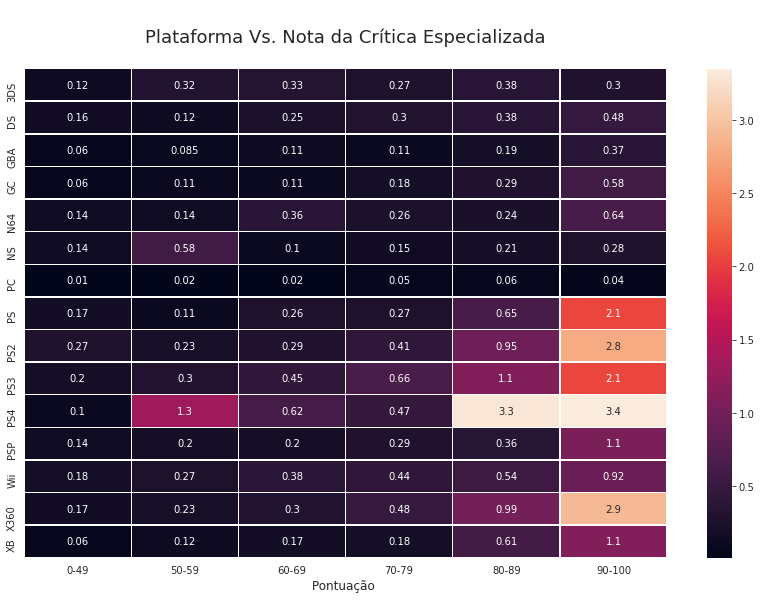

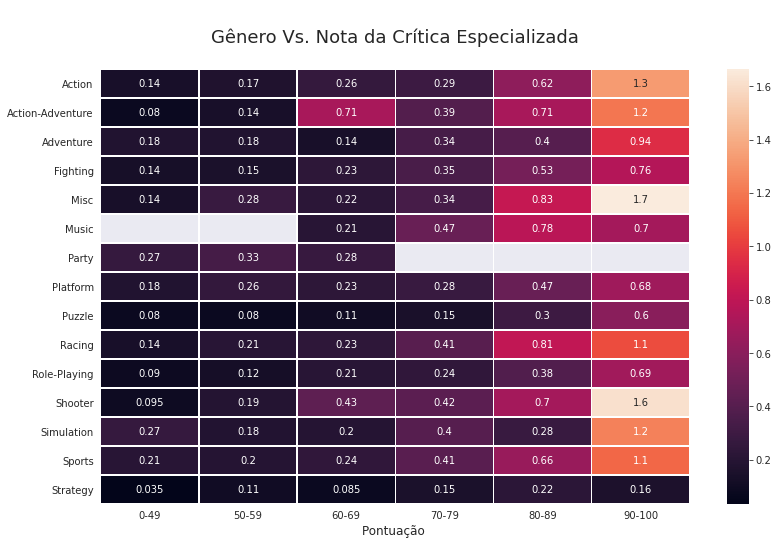

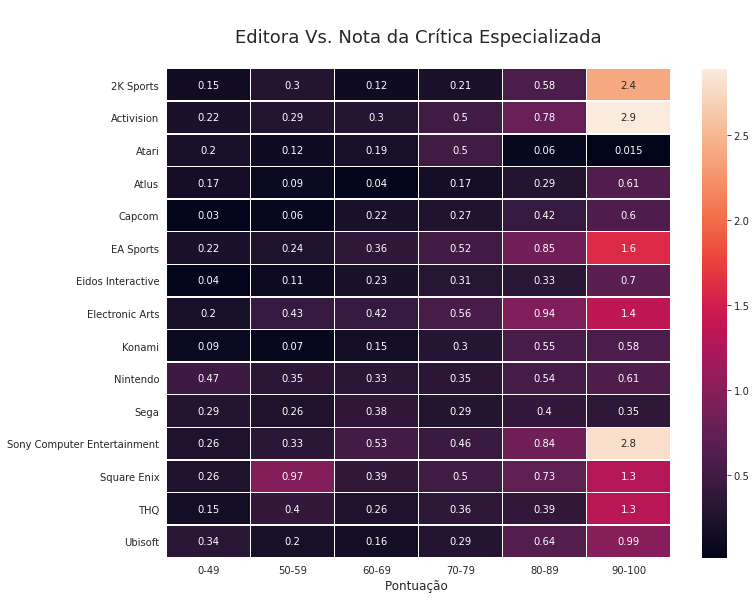

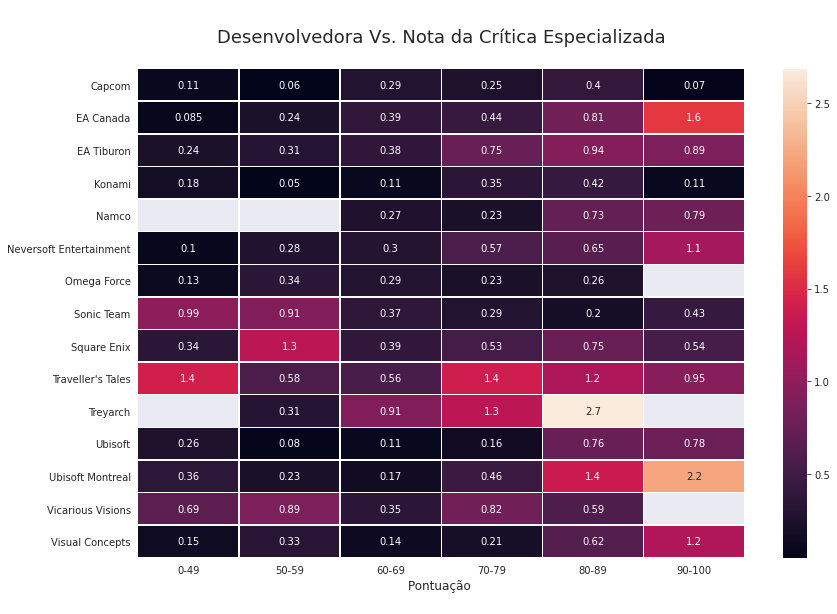

In [ ]:
# Selecionando as colunas de interesse
colunas = ['Plataforma', 'Gênero', 'Editora', 'Desenvolvedora']

for col in colunas:
  pack = []
  top = data_dfh[['Título', col]].groupby([col]).count().sort_values('Título', ascending = False).reset_index()[:15]
  for x in top[col]:
    pack.append(x)
  data_dfh[col] = data_dfh[col].apply(lambda x: in_top(x))
  dfh_plataforma = data_dfh[[col, 'Pontuacao', 'Vendas_Globais']].groupby([col, 'Pontuacao']).median().reset_index().pivot(col, "Pontuacao", "Vendas_Globais")
  plt.figure(figsize = (width(col), height(col)))
  sns.heatmap(dfh_plataforma, annot = True, fmt = ".2g", linewidths = .5).set_title((' \n'+col+' Vs. Nota da Crítica Especializada\n'), fontsize = 18)
  plt.ylabel('', fontsize = 14)
  plt.xlabel('Pontuação \n', fontsize = 12)
  pack = []

#### Nos resultados acima, verificamos que há uma correlação muito pertinente entre o número de vendas e a nota da crítica. Vamos verificar em mais detalhes.

## Correlações do dataset
Conversão de colunas categóricas em códigos numéricos

In [ ]:
# Selecionando as colunas de interesse
colunas = ['Plataforma', 'Gênero', 'Editora', 'Desenvolvedora']

# Percorrendo as colunas
for col in colunas:
    uniques = data_df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        data_df.loc[data_df[col] == k, col] = v

In [ ]:
# Criando uma nova variável dataframe
df1 = data_df[['Plataforma','Gênero','Editora','Lançamento','Critic_Score','Vendas_Globais']]
# Transformando a coluna Lançamento (string) em datetime
df1['Lançamento'] =  pd.to_datetime(df1['Lançamento'], format = '%Y/%m/%d')
# Selecionando apenas o ano de lançamento
df1['Lançamento'] = df1['Lançamento'].dt.year
print(df1['Lançamento'])

# Removendo os valores nulos
df1 = df1.dropna().reset_index(drop = True)
df1 = df1.astype('float64')

3        2013.0
5        2014.0
8        2002.0
9        2013.0
10       2001.0
          ...  
57758    2018.0
57759    2018.0
57760    2018.0
57761    2013.0
57762    2012.0
Name: Lançamento, Length: 19315, dtype: float64


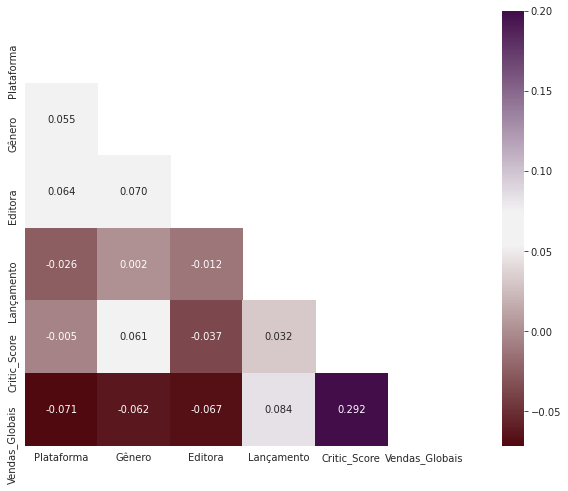

In [ ]:
# Criando uma máscara
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True

# Obs: 680, 350/470
cmap = sns.diverging_palette(730, 300, sep = 20, as_cmap = True, s = 85, l = 15, n = 20)
# Colocando fundo branco
with sns.axes_style('white'):
    # Plotando
    fig, ax = plt.subplots(1,1, figsize = (15,8))
    ax = sns.heatmap(df1.corr(), mask = mask, vmax = 0.2, square = True, annot = True, fmt = ".3f", cmap = cmap)

#### Podemos perceber fortes correlações entre a nota da crítica e as vendas globais.

[(0.0, 17.5)]

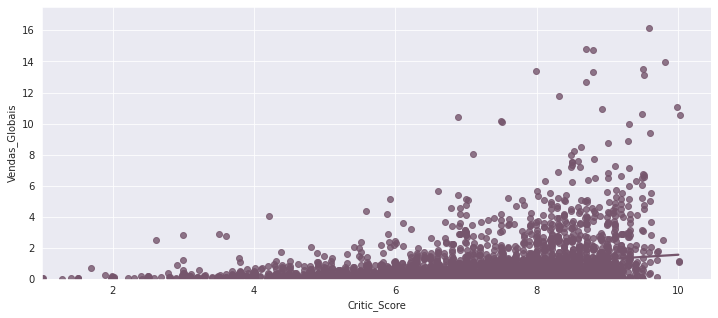

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
sns.regplot(x = "Critic_Score", y = "Vendas_Globais", data = df1, ci = None, color = "#75556c", x_jitter = .02).set(ylim = (0, 17.5))

#### Parece que quando um jogo recebe uma nota alta da crítica, ele vende mais. Parece que a nota da crítica é uma boa feature.

### Definindo "hits" como aqueles com vendas acima de 1 milhão de unidades. 

Esse será o alvo em nosso modelo de previsão, onde preveremos se um jogo será um sucesso ou não.

In [ ]:
dfb = data_df2[['Título','Plataforma','Gênero','Editora','Lançamento','Critic_Score','Vendas_Globais']]
dfb = dfb.dropna().reset_index(drop = True)
df2 = dfb[['Plataforma','Gênero','Editora','Lançamento','Critic_Score','Vendas_Globais']]
df2['Hit'] = df2['Vendas_Globais']
df2.drop('Vendas_Globais', axis = 1, inplace = True)

In [ ]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

#### Vamos representar graficamente a relação entre as notas da crítico e os hits usando uma amostra de 5%

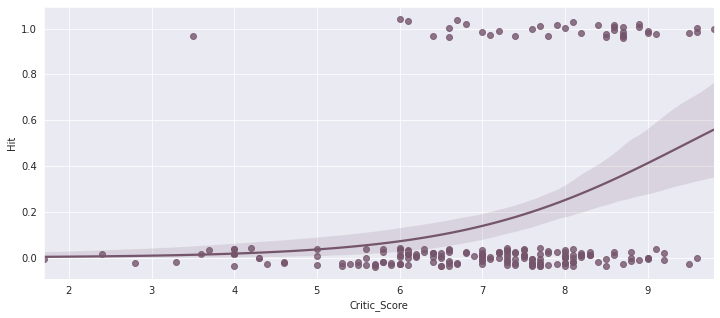

In [ ]:
# Gráfico de regressão logística com amostra dos dados
n = ceil(0.05 * len(df2['Hit']))
fig, ax = plt.subplots(1,1, figsize = (12,5))
sns.regplot(x = "Critic_Score", y = "Hit", data = df2.sample(n = n),
            logistic = True, n_boot = 500, y_jitter = .04, color = "#75556c")

#### Como esperado, parece que os hits geralmente estão próximos de notas altas. A maioria se concentra em notas acima de 70. Há exceções, claro. Existem muitos jogos que fizeram um marketing "absurdo", atingindo marcas gigantescas de vendas, mas que quando foram lançados, não eram tão bons ou apresentavam muitos erros.

## Modelo de Previsão
#### Para prever jogos com vendas unitárias de 1 milhão ou mais (hits).


In [ ]:
# Visualizando as 10 primeiras linhas
df2[:5]

,Plataforma,Gênero,Editora,Lançamento,Critic_Score,Hit
0,PS3,Action,Rockstar Games,2013-09-17,9.4,1
1,PS4,Action,Rockstar Games,2014-11-18,9.7,1
2,PS2,Action,Rockstar Games,2002-10-28,9.6,1
3,PS2,Action,Rockstar Games,2001-10-23,9.5,1
4,X360,Action,Rockstar Games,2008-04-29,10.0,1


In [ ]:
from pandas import get_dummies

# Convertendo variáveis categóricas em variáveis dummy/indicadoras.
df_copia = pd.get_dummies(df2)

In [ ]:
df_copia[:5]

,Critic_Score,Hit,Plataforma_3DS,Plataforma_DC,Plataforma_DS,Plataforma_GB,Plataforma_GBA,Plataforma_GBC,Plataforma_GC,Plataforma_GEN,Plataforma_N64,Plataforma_NES,Plataforma_NS,Plataforma_PC,Plataforma_PS,Plataforma_PS2,Plataforma_PS3,Plataforma_PS4,Plataforma_PSN,Plataforma_PSP,Plataforma_PSV,Plataforma_SAT,Plataforma_SNES,Plataforma_VC,Plataforma_Wii,Plataforma_WiiU,Plataforma_X360,Plataforma_XB,Plataforma_XBL,Plataforma_XOne,Gênero_Action,Gênero_Action-Adventure,Gênero_Adventure,Gênero_Board Game,Gênero_Education,Gênero_Fighting,Gênero_MMO,Gênero_Misc,Gênero_Music,Gênero_Party,...,Lançamento_2018-06-15,Lançamento_2018-06-19,Lançamento_2018-06-21,Lançamento_2018-06-22,Lançamento_2018-06-26,Lançamento_2018-06-29,Lançamento_2018-07-10,Lançamento_2018-07-13,Lançamento_2018-07-31,Lançamento_2018-08-03,Lançamento_2018-08-07,Lançamento_2018-08-14,Lançamento_2018-08-15,Lançamento_2018-08-24,Lançamento_2018-08-28,Lançamento_2018-08-31,Lançamento_2018-09-04,Lançamento_2018-09-14,Lançamento_2018-09-18,Lançamento_2018-09-21,Lançamento_2018-09-25,Lançamento_2018-09-28,Lançamento_2018-10-02,Lançamento_2018-10-05,Lançamento_2018-10-09,Lançamento_2018-10-12,Lançamento_2018-10-16,Lançamento_2018-10-19,Lançamento_2018-10-23,Lançamento_2018-10-26,Lançamento_2018-10-30,Lançamento_2018-11-02,Lançamento_2018-11-06,Lançamento_2018-11-14,Lançamento_2018-11-16,Lançamento_2018-11-29,Lançamento_2018-11-30,Lançamento_2018-12-04,Lançamento_2018-12-07,Lançamento_2019-09-24
0,9.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = df_copia
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis = 1)
x = df3.values

In [ ]:
# Dividindo o dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2)

## Classificador Random Forest

In [ ]:
radm = RandomForestClassifier(random_state = 2).fit(x_train, y_train)
y_val_1 = radm.predict_proba(x_test)
print("Precisão de validação: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == y_test)/len(y_test))

Precisão de validação:  0.8443708609271523


In [ ]:
all_predictions = radm.predict(x_test)
print(classification_report(y_test, all_predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1693
           1       0.80      0.29      0.43       421

    accuracy                           0.84      2114
   macro avg       0.82      0.64      0.67      2114
weighted avg       0.84      0.84      0.81      2114



[Text(10.5, 0.5, 'Valor Esperado'), Text(0.5, 1.5, 'Valor Previsto')]

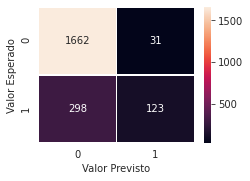

In [ ]:
fig, ax = plt.subplots(figsize = (3.5,2.5))
sns.heatmap(confusion_matrix(y_test, all_predictions), annot = True, linewidths = .5, ax = ax, fmt = "d").set(xlabel = 'Valor Previsto', ylabel = 'Valor Esperado')

## Regressão Logística

In [ ]:
log_reg = LogisticRegression().fit(x_train, y_train)
y_val_2 = log_reg.predict_proba(x_test)
print("Precisão de validação: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == y_test)/len(y_test))

Precisão de validação:  0.8396404919583728


In [ ]:
all_predictions2 = log_reg.predict(x_test)
print(classification_report(y_test, all_predictions2))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1693
           1       0.69      0.35      0.47       421

    accuracy                           0.84      2114
   macro avg       0.77      0.66      0.69      2114
weighted avg       0.82      0.84      0.82      2114



[Text(10.5, 0.5, 'Valor Esperado'), Text(0.5, 1.5, 'Valor Previsto')]

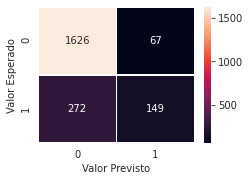

In [ ]:
fig, ax = plt.subplots(figsize = (3.5,2.5))
sns.heatmap(confusion_matrix(y_test, all_predictions2), annot = True, linewidths = .5, ax = ax, fmt = "d").set(xlabel = 'Valor Previsto', ylabel = 'Valor Esperado')

#### Desempenho do recurso de classificação

In [ ]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Mostrando o ranking das features
print('Recurso ranking (top 10):')

for f in range(10):
    print('%d. recurso %d %s (%f)' % (f+1 , indices[f], df3.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Recurso ranking (top 10):
1. recurso 0 Critic_Score (0.147138)
2. recurso 15 Plataforma_PS3 (0.022449)
3. recurso 25 Plataforma_X360 (0.016331)
4. recurso 98 Editora_Electronic Arts (0.015582)
5. recurso 44 Gênero_Shooter (0.013531)
6. recurso 14 Plataforma_PS2 (0.012261)
7. recurso 12 Plataforma_PC (0.012074)
8. recurso 29 Gênero_Action (0.011296)
9. recurso 204 Editora_Rockstar Games (0.011214)
10. recurso 1224 Lançamento_2007-11-13 (0.010692)


## Quais jogos de 2018 continuarão sendo um sucesso?



In [ ]:
nao_hit_copia = df_copia[df_copia['Hit'] == 0]

In [ ]:
df4 = nao_hit_copia
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis = 1)
x = df4.values

In [ ]:
pred = log_reg.predict_proba(x)

In [ ]:
dftop = data_df2[['Título','Plataforma','Gênero','Editora','Lançamento','Critic_Score','Vendas_Globais']]
# Transformando a coluna Lançamento (string) em datetime
dftop['Lançamento'] =  pd.to_datetime(dftop['Lançamento'], format = '%Y/%m/%d')
# Selecionando apenas o ano de lançamento
dftop['Lançamento'] = dftop['Lançamento'].dt.year

dftop = dftop.dropna().reset_index(drop = True)

In [ ]:
dftop = dftop[dftop['Vendas_Globais'] < 1]

In [ ]:
dftop['Hit_Probability'] = pred[:,1]

In [ ]:
dftop = dftop[dftop['Lançamento'] == 2018]
dftop.sort_values(['Hit_Probability'], ascending = [False], inplace = True)
dftop = dftop[['Título', 'Plataforma', 'Hit_Probability']]

### Top 10 jogos de 2018 com a maior probabilidade de se tornarem um hit - Regressão Logística

In [ ]:
dftop[:10].reset_index(drop = True)

,Título,Plataforma,Hit_Probability
0,Astro Bot Rescue Mission,PS4,0.717850
1,The Elder Scrolls Online: Summerset,PS4,0.697452
2,Monster Hunter: World,XOne,0.584116
3,A Way Out,XOne,0.567234
4,Naruto to Boruto: Shinobi Striker,PS4,0.552486
5,A Way Out,PS4,0.515203
6,Burnout Paradise Remastered,PS4,0.500220
7,Burnout Paradise Remastered,XOne,0.432194
8,Wolfenstein II: The New Colossus,NS,0.362732
9,Attack on Titan 2,PS4,0.351487


### Top 10 jogos de 2018 com a maior probabilidade de se tornarem hits - Random Forest

In [ ]:
pred2 = radm.predict_proba(x)

In [ ]:
dftop2 = data_df2[['Título','Plataforma','Gênero','Editora','Lançamento','Critic_Score','Vendas_Globais']]
# Transformando a coluna Lançamento (string) em datetime
dftop2['Lançamento'] =  pd.to_datetime(dftop2['Lançamento'], format = '%Y/%m/%d')
# Selecionando apenas o ano de lançamento
dftop2['Lançamento'] = dftop2['Lançamento'].dt.year

dftop2 = dftop2.dropna().reset_index(drop = True)

In [ ]:
dftop2 = dftop2[dftop2['Vendas_Globais'] < 1]

In [ ]:
dftop2['Hit_Probability'] = pred[:,1]

In [ ]:
dftop2 = dftop2[dftop2['Lançamento'] == 2018]
dftop2.sort_values(['Hit_Probability'], ascending = [False], inplace = True)
dftop2 = dftop2[['Título', 'Plataforma', 'Hit_Probability']]

In [ ]:
dftop2[:10].reset_index(drop = True)

,Título,Plataforma,Hit_Probability
0,Astro Bot Rescue Mission,PS4,0.717850
1,The Elder Scrolls Online: Summerset,PS4,0.697452
2,Monster Hunter: World,XOne,0.584116
3,A Way Out,XOne,0.567234
4,Naruto to Boruto: Shinobi Striker,PS4,0.552486
5,A Way Out,PS4,0.515203
6,Burnout Paradise Remastered,PS4,0.500220
7,Burnout Paradise Remastered,XOne,0.432194
8,Wolfenstein II: The New Colossus,NS,0.362732
9,Attack on Titan 2,PS4,0.351487


# Bônus: apenas estudando mais sobre outras técnicas

## Comparando diferentes regressores

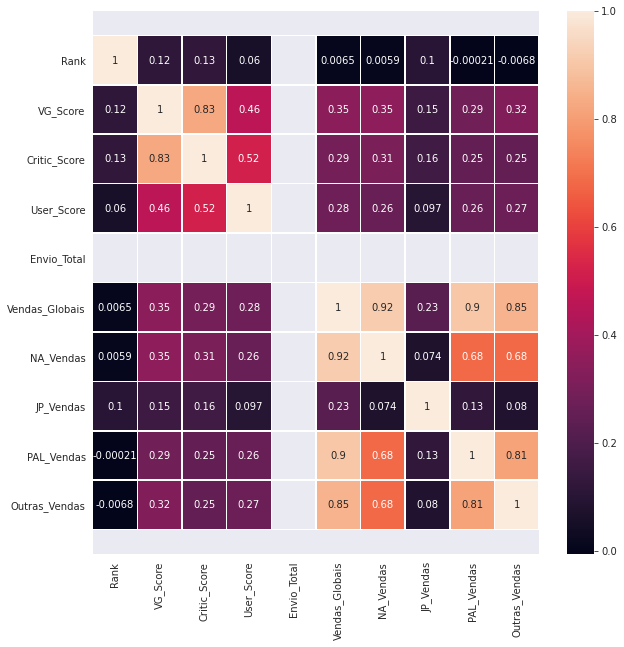

In [ ]:
# Determinando a relevância das features utilizando heatmap no cálculo das variáveis resultantes
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))

# Plotando o heatmap
g = sns.heatmap(data_df[top_corr_features].corr(),annot = True,linewidths = .5)
b, t = plt.ylim() # Finding the values for bottom and top
b = b + 0.5 
t = t - 0.5 
plt.ylim(b, t) 
plt.show() 

In [ ]:
# Ficando apenas com as features úteis
# A partir do heatmap, percebemos que as colunas NA_Vendas, EU_Vendas, JP_Vendas e Outros_Vendas são as features mais úteis para se determinar as vendas globais
x = data_df.iloc[:,6:-1].values
print(x[0])

[168 nan 9.4 nan nan 20.32 6.37 0.99 9.85 3.12 '2013-09-17']


In [ ]:
# Visualizando
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[8.3 0.  0.  ... 0.  0.  0. ]
 [7.7 0.  0.  ... 0.  0.  0. ]
 [4.8 0.  0.  ... 0.  0.  0. ]
 ...
 [9.  0.  0.  ... 0.  0.  0. ]
 [8.9 0.  0.  ... 0.  0.  0. ]
 [7.7 0.  0.  ... 0.  0.  0. ]]
[[9.  0.  0.  ... 0.  0.  0. ]
 [7.4 0.  0.  ... 0.  0.  0. ]
 [9.1 0.  0.  ... 0.  0.  0. ]
 ...
 [6.1 0.  0.  ... 0.  0.  0. ]
 [8.7 0.  0.  ... 0.  0.  0. ]
 [6.5 0.  0.  ... 0.  0.  0. ]]
[0 0 0 ... 0 1 0]
[1 0 1 ... 0 0 0]


## K-Nearest Neighbors Regression

In [ ]:
## Encontrando o melhor número de vizinhos
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()    

In [ ]:
# Treinando o modelo KNN no conjunto de treinamento
regressor_knn = KNeighborsRegressor(n_neighbors = 12)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.25729368690447074


## Linear Support Vector Regression

In [ ]:
# Treinando no modelo de treinamento
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Prevendo o resultado do teste
y_pred = regressor_SVR.predict(x_test)

In [ ]:
# Calculando r2
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.03080984963627409


### XGBoost

In [ ]:
# Aplicando o modelo XGBoost Regression ao conjunto de treinamento
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

[18:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = regressor_xgb.predict(x_test)

In [ ]:
# Calculando r2 
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.24026418189369025


## Comparando o r2 dos diferentes modelos

In [ ]:
# Comparando o r2 dos diferentes modelos
labelList = ['K-NearestNeighbors','Decision Tree',
             'Linear SVR','XGBoost Reg.']
mylist = [r2_knn, r2_tree, r2_linearSVR, r2_xgb]
for i in range(0,len(mylist)):
    mylist[i] = np.round(mylist[i]*100, decimals = 3)
print(mylist)

[25.729, -17.452, 19.327, 3.081, 24.026]


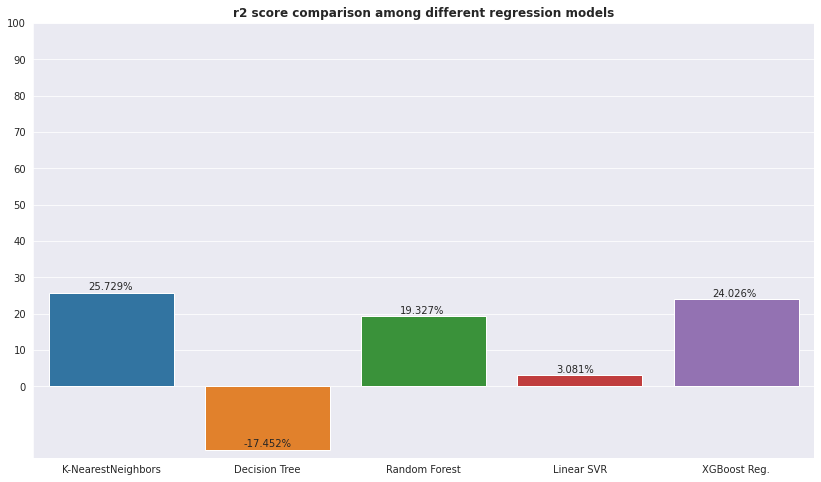

In [ ]:
plt.figure(figsize = (14,8))
ax = sns.barplot(x = labelList,y = mylist)
plt.yticks(np.arange(0, 101, step = 10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

